# Tensorflow Basic Concepts | Practical Session Part I

## 1 Introduction

In this week's practical session, we will have a look at the tensorflow python package, which helps us to generate neural networks in python. Simultaneously, the lecture contents are revisited and translated into small programming exercises with tensorflow.


The practical session is divided into three different jupyter notebooks. This notebook features the first part of the practical session and deals with the basic concepts of tensorflow. In the other notebooks, an artificial neuron is modelled and used for linear regression and binary classification tasks. 

### 1.1 Imports

For our first look into tensorflow, we will need the tensorflow and the numpy package:

In [2]:
import tensorflow as tf
import numpy as np

## 2 Tensorflow Basics

This chapter introduces the tensorflow package for python. The chapter is divided into several sections: After a short introduction dealing with the general concept of tensorflow, the most important tensorflow classes needed to generate neural networks are presented in their respective sections. In order to illustrate the usage of the described classes,  programming examples are shown. 

### 2.1 Introduction

The tensorflow framework employs a data stream oriented approach. Hence, tensorflow relies on so called computational graphs that define the sequential order of mathematical operations that tensorflow evaluates. The operations defined in the computational graph are represented by nodes. These nodes are connected via directed edges that define the information flow through the network. Through this approach, a mathematical pipeline is defined. 


The data flowing through the edges of the computational graph is provided in the form of tensors, hence the name tensorflow. A tensor is a n-dimensional data element. The dimension of a tensor is often called a "rank" - e.g. a scalar is a rank 0 tensor, a vector is a rank 1 tensor and a matrix is a rank 2 tensor. 

Before actual calculations are performed by tensorflow, the computational graph has to be defined statically (i.e. the architecture of the graph is defined). Before a concrete example is provided in section 2.6, the following subsections shed light on the different types of nodes in a tensorflow computational graph.

### 2.2 Constants

The first computational node class in tensorflow is the constant. A tensorflow constant serves to represent a fixed value, that is not able to change its state during computation of the graph. A tensorflow constant is defined as follows:

In [3]:
# Let's define our first tensorflow constant with value 0.5
my_const = tf.constant(0.5, name="my_const")

When defining a constant in tensorflow, the constant's value has to be passed. Alongside the value of a constant, its shape and data type can be explicitely given. However, both are infered automatically by tensorflow in accordance with the provided value. In addition to value, shape and data type, an optional name may be provided (this name does not have to match the variable name a tf.constant is assigned to in python).


! Because tensorflow uses a C++ backbone, tensorflow is not flexible with data types (e.g. if you initialize a constant with 0, then a int type is infered, whereas a initialization with 0.0 infers a tf.float32 type) ! 


The tensorflow documentation for a constant can be found here: https://www.tensorflow.org/api_docs/python/tf/constant

Different data types supported by tensorflow can be found here: https://www.tensorflow.org/api_docs/python/tf/dtypes/DType

### 2.3 Variables

In contrast to constants, tensorflow variables may change their value during computations. They may be used to store the output of a tensorflow computational graph or to log intermediate results inside the computational graph. A tensorflow variable is defined as follows:

In [4]:
# Define a tensorflow variable with an initial value of 2.0 and the name my_const
my_var = tf.Variable(2.0, name="my_var")

There are many arguments that can be passed to a tensorflow variable. The most common ones are the initial value and the name. Please note that tensorflow is picky with data types again!

The tensorflow documentation for a variable can be found here: https://www.tensorflow.org/api_docs/python/tf/Variable

### 2.4 Operations

Tensorflow operations define mathematical operations in the tensorflow graph. There are many different tensorflow operations. One example shall be given in the following: 

In [5]:
# Define a tensorflow operation that adds the previously defined constant and the variable from above
my_add = tf.add(my_const, my_var)

Please note that operations are not carried out immediately. Instead, they are defined as static parts of the tensorflow graph first and will only be evaluated later on, when running a tensorflow session. This fact can be observed when printing the my_add operation:

In [6]:
print(my_add)

Tensor("Add:0", shape=(), dtype=float32)


The tensorflow documentation for operations can be found here: https://www.tensorflow.org/api_docs/python/tf/Operation

### 2.5 Initialization

A special operation is the initialization operation. It is used to initialize the global variables of a tensorflow graph. Before any calculations can take place, the initialization operation has to be defined and executed. 
A simple way to define a initialization operation is given by:

In [7]:
ini = tf.global_variables_initializer()

### 2.6 Sessions

A tensorflow session is used to execute a previously defined tensorflow graph. To create a session, a tensorflow session object has to be created. Each session object provides a method "run" used to execute computations from the graph. 
Before further computations can be carried out, the initialization operation has to be run by the session object as well. A common construction to automatically close the tensorflow session after all computations have been carried out can be seen in the code block below:

In [8]:
with tf.Session() as sess: 
    sess.run(ini)
    my_sum = sess.run(my_add)
    print("My sum is: ", my_sum)

My sum is:  2.5


Please note that tensorflow executed calculations on our computational graph upon the sess.run call. Also note that tensorflow automatically executed all operations necessary to compute the my_add operation by scanning the upstream of our computational graph for relevant operations without being explicitely told.

### 2.7 Placeholders

In the context of machine learning it is common to feed data into a computational graph and observe the different outputs. Hence, we do not model inputs by single variables or constants but by so called placeholders. 

Placeholders define variables that can be fed to the computational graph while running a session. A placeholder is defined as follows: 

In [9]:
my_placeholder = tf.placeholder(tf.float32, shape=[None, 1], name="input")

In contrast to constants and variables, no fixed or initial values are supplied during the initialization of a placeholder. Instead a data type and a shape are defined. The tensorflow placeholder consequentially expects data of the specified data type and shape only. 

In the example above, a placeholder was initialized to be of float32 type (floating point number with 32 bit). Additionally the shape of the placeholder was set to [None,1], meaning that an arbitrary number of one dimensional floating points is expected to be fed through this placeholder into the graph. Hence, the above placeholder is an input interface for scalars. 

If vectors where to be supplied the shape would be [None, 2], for matrices [None, 3] and so on. The number of instances fed through the placeholder amounts to the first component of the shape. If it is "None" like in the example, the number is arbitrary.

Please find the placeholder documentation here: https://www.tensorflow.org/api_docs/python/tf/placeholder

### 2.8 Example 2

In this section a small example combining all learnings up to this point is presented.

Suppose you want to calculate the following equation using tensorflow: 

y = (a+b)*x

here a and b are constants, x is an input variable that shall be fed to the equation with different values and y is the output variable

A suitable tensorflow code to solve this problem and calculate y looks like this:

In [10]:
# Define constants
a = tf.constant(1.0, name="a")
b = tf.constant(2.0, name="b")

# Define input
x = tf.placeholder(tf.float32, name="x")

# Define operations
sum_ab = tf.add(a,b)
y = tf.multiply(sum_ab, x)

# Create initialization operation
ini = tf.global_variables_initializer()

# Create input data
x_in = np.linspace(-5,5,6) # 6 equally spaced numbers from -5 to 5 (i.e. [-5, -3, -1, 1, 3, 5])
x_in = x_in[:, np.newaxis]

# Run session
with tf.Session() as sess:
    
    # Execute graph
    sess.run(ini)
    out = sess.run(y, feed_dict={x: x_in})
    
    # Print result
    print("y = \n", out)


y = 
 [[-15.]
 [ -9.]
 [ -3.]
 [  3.]
 [  9.]
 [ 15.]]


Note that the sess.run command was supplied with a feed_dict argument, passing data to the previously defined placeholder "x". A feed dictionary always determines which data is passed through the placeholders of a tensorflow graph. It is important to define all data inputs in the feed dictionary that are needed to compute the operations executed by the sess.run command.

## 3 Loss Function

In the last part of this jupyter notebook a loss function is manually defined in tensorflow. The same loss function will be used in all other jupyter notebooks of this practical session. 
Oftentimes, loss functions are not manually defined when working with tensorflow. Instead, tensorflow implementations for loss functions are used. 

You can find a list of pre-defined tensorflow loss functions here: https://www.tensorflow.org/api_docs/python/tf/losses

The loss function that is to be defined manually in this practical session is: 

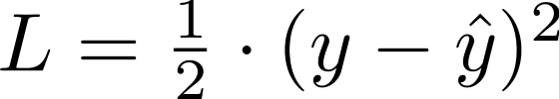

### 3.1 Computational Graph

Since tensorflow is graph based, it is reasonable to sketch a computational graph of the equation that shall be implemented before writing any code. 
The computational graph corresponding to the loss function that is to be translated to tensorflow code in the next section may look like this: 

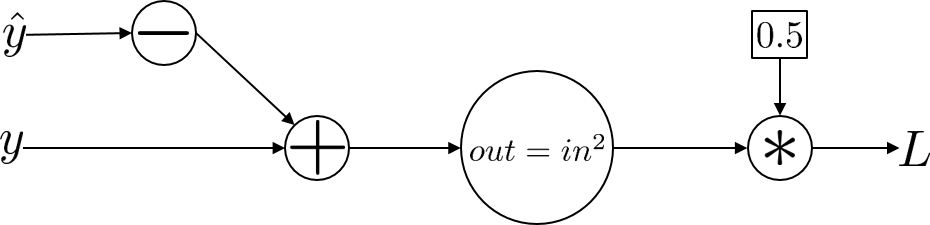

### 3.2 Tensorflow Translation

The computational graph from the last section is now translated into tensorflow code. From the computational graph, it is evident, that two placeholders (inputs), 4 operations and one constant have to be defined in the tensorflow code. The definition of the tensorflow elements can be carried out in one single line of code with many nested functions or in multiple lines of code. For this example, the latter approach is employed:

In [11]:
# Definition of the placeholders
y_hat = tf.placeholder(tf.float32, name = "y_hat")
y = tf.placeholder(tf.float32, name = "y")

# Definition of the constant
c = tf.constant(0.5, name = "c")

# Definition of the operations
o1 = tf.negative(y_hat)
o2 = tf.add(o1, y)
o3 = tf.math.pow(o2, 2)
o4 = tf.multiply(o3, c)
L = o4

Lastly, the Loss function shall be tested: 

In [12]:
# Define variable initializer
ini = tf.global_variables_initializer()

# Define input data
y_hat_data  = np.linspace(-5,5,6)
y_data = np.linspace(-1,1,6)

# Prepare input data for tensorflow placeholder feeding
y_hat_data = y_hat_data[:, np.newaxis]
y_data = y_data[:, np.newaxis]

# Run tensorflow session
with tf.Session() as sess:
    sess.run(ini)
    loss = sess.run(L, feed_dict = {y: y_data, y_hat: y_hat_data})

# Check the output

print("Computed losses for: ")
print("y = \n", y_data)
print("\ny_hat = \n", y_hat_data)
print("\n Resulting losses are: ")
print("L = \n", loss)

Computed losses for: 
y = 
 [[-1. ]
 [-0.6]
 [-0.2]
 [ 0.2]
 [ 0.6]
 [ 1. ]]

y_hat = 
 [[-5.]
 [-3.]
 [-1.]
 [ 1.]
 [ 3.]
 [ 5.]]

 Resulting losses are: 
L = 
 [[8.        ]
 [2.88      ]
 [0.32000002]
 [0.32000002]
 [2.88      ]
 [8.        ]]


## 4 Evaluation

Please evaluate the "Introduction to Neural Networks" practical sessions and lecture using either the link: 

https://evasys.zv.tum.de/evasys/online.php?p=AIAT-7

or the QR code:

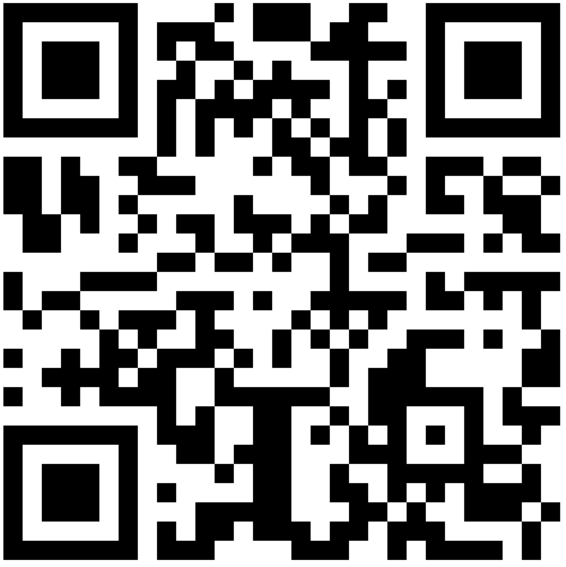